In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kmeans import KMeansClustering
from em import EMClustering
import warnings
warnings.filterwarnings("ignore")

In [2]:
%load_ext autoreload
%autoreload 2

# MKT

In [18]:
dataset_path = "../datasets/cleaned_data/mkt_camp_v1/train.csv"
df = pd.read_csv(dataset_path)

# Kmeans

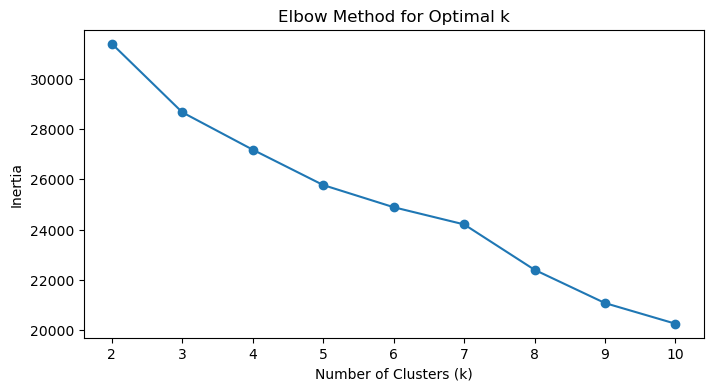

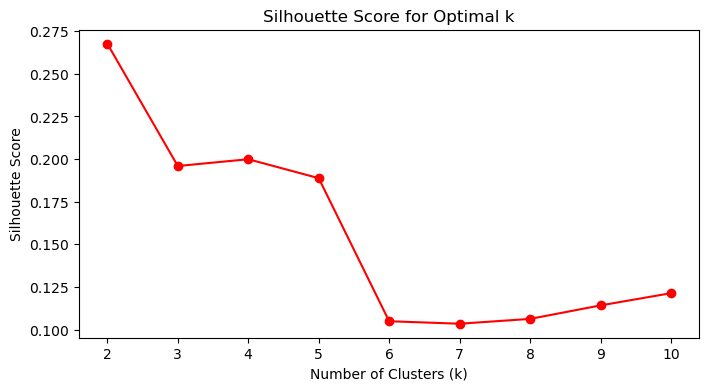

Best k selected: 2


In [19]:
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    model = KMeansClustering(n_clusters=k)
    labels = model.fit(df)
    inertia.append(model.inertia_)
    silhouette_scores.append(model.silhouette_score())

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='o', color='r')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

best_k = K_range[np.argmax(silhouette_scores)]
print(f"Best k selected: {best_k}")


Results saved to ../datasets/clustering/mkt/kmeans_train.csv
Model saved to ../model_checkpoints/mkt/kmeans_model.pkl


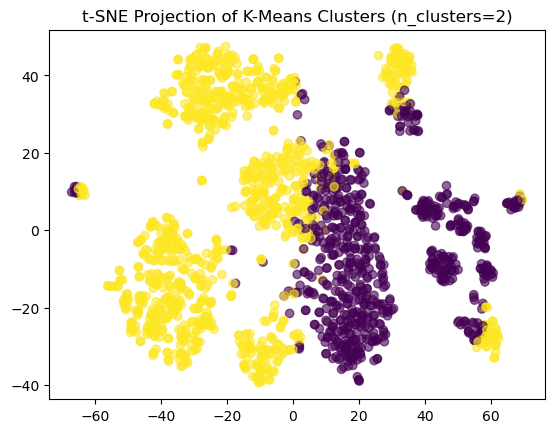

In [20]:

kmeans = KMeansClustering(n_clusters=best_k, save_data=True)
labels = kmeans.fit(df)

kmeans.save_results(filename="../datasets/clustering/mkt/kmeans_train.csv")
kmeans.save_model(filename="../model_checkpoints/mkt/kmeans_model.pkl")

kmeans.plot_clusters()

In [6]:
dataset_path = "../datasets/cleaned_data/mkt_camp_v1/test.csv"
df_test = pd.read_csv(dataset_path)

KMeansClustering.inference("../model_checkpoints/mkt/kmeans_model.pkl", df_test, output_file="../datasets/clustering/mkt/kmeans_test.csv")

Loading model from ../model_checkpoints/mkt/kmeans_model.pkl...
Model loaded successfully!
Inference results saved to ../datasets/clustering/mkt/kmeans_test.csv


# EM

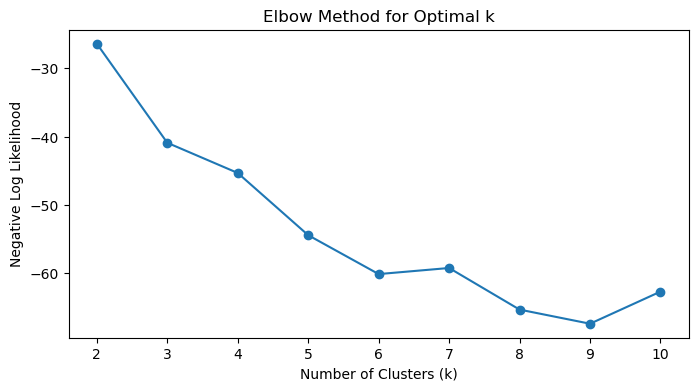

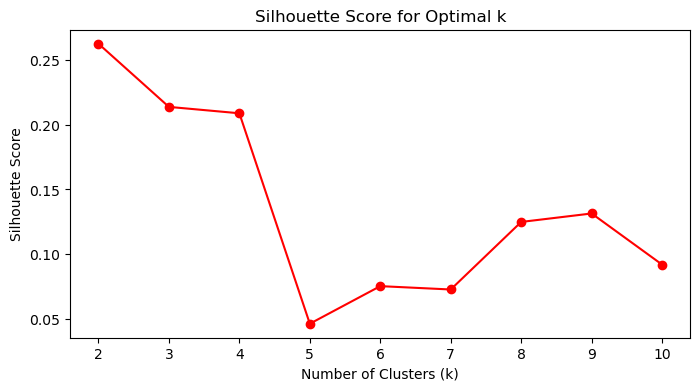

Best k selected: 2


In [11]:
negative_log_likelihood_score = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    model = EMClustering(n_components=k)
    labels = model.fit(df)
    negative_log_likelihood_score.append(model.score)
    silhouette_scores.append(model.silhouette_score())

plt.figure(figsize=(8, 4))
plt.plot(K_range, negative_log_likelihood_score, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Negative Log Likelihood")
plt.title("Elbow Method for Optimal k")
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='o', color='r')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

best_k = K_range[np.argmax(silhouette_scores)]
print(f"Best k selected: {best_k}")


Results saved to ../datasets/clustering/mkt/em_train.csv
Model saved to ../model_checkpoints/mkt/em_model.pkl


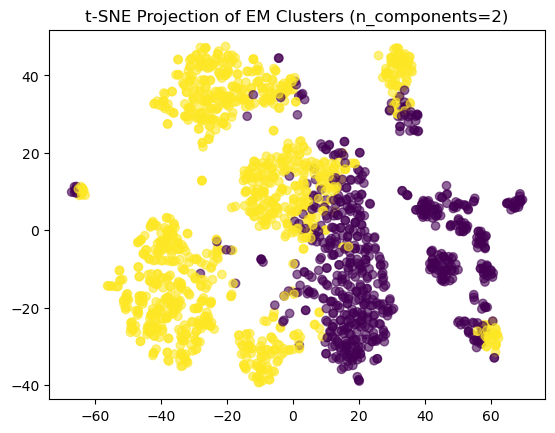

In [12]:
em = EMClustering(n_components=best_k, save_data=True)
labels = em.fit(df)

em.save_results(filename="../datasets/clustering/mkt/em_train.csv")
em.save_model(filename="../model_checkpoints/mkt/em_model.pkl")

em.plot_clusters()

In [13]:
dataset_path = "../datasets/cleaned_data/mkt_camp_v1/test.csv"
df_test = pd.read_csv(dataset_path)

EMClustering.inference("../model_checkpoints/mkt/em_model.pkl", df_test, output_file="../datasets/clustering/mkt/em_test.csv")

Loading model from ../model_checkpoints/mkt/em_model.pkl...
Model loaded successfully!
Inference results saved to ../datasets/clustering/mkt/em_test.csv


# Spotify

In [25]:
dataset_path = "../datasets/cleaned_data/spotify_v1/train.csv"
df = pd.read_csv(dataset_path)

# Kmeans

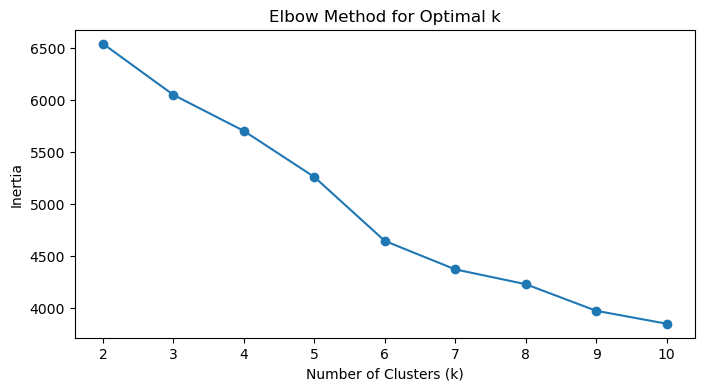

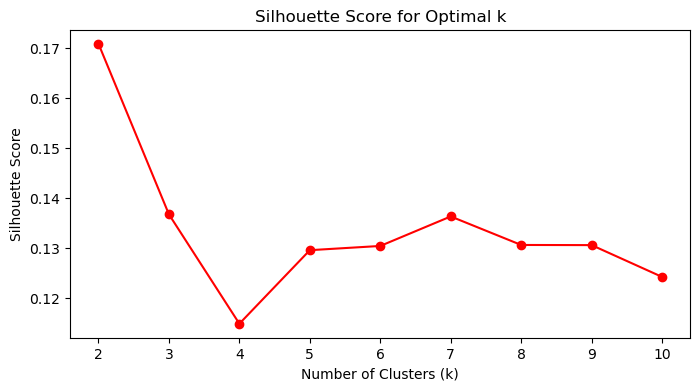

Best k selected: 2


In [22]:
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    model = KMeansClustering(n_clusters=k)
    labels = model.fit(df)
    inertia.append(model.inertia_)
    silhouette_scores.append(model.silhouette_score())

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='o', color='r')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

best_k = K_range[np.argmax(silhouette_scores)]
print(f"Best k selected: {best_k}")


Results saved to ../datasets/clustering/spotify/kmeans_train.csv
Model saved to ../model_checkpoints/spotify/kmeans_model.pkl


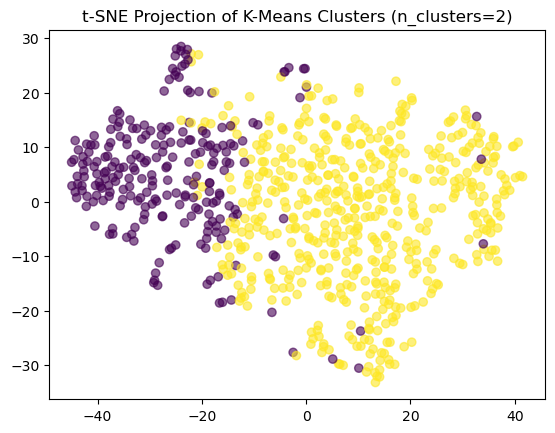

In [23]:
kmeans = KMeansClustering(n_clusters=best_k, save_data=True)
labels = kmeans.fit(df)

kmeans.save_results(filename="../datasets/clustering/spotify/kmeans_train.csv")
kmeans.save_model(filename="../model_checkpoints/spotify/kmeans_model.pkl")

kmeans.plot_clusters()

In [24]:
dataset_path = "../datasets/cleaned_data/spotify_v1/test.csv"
df_test = pd.read_csv(dataset_path)

KMeansClustering.inference("../model_checkpoints/spotify/kmeans_model.pkl", df_test, output_file="../datasets/clustering/spotify/kmeans_test.csv")

Loading model from ../model_checkpoints/spotify/kmeans_model.pkl...
Model loaded successfully!
Inference results saved to ../datasets/clustering/spotify/kmeans_test.csv


# EM

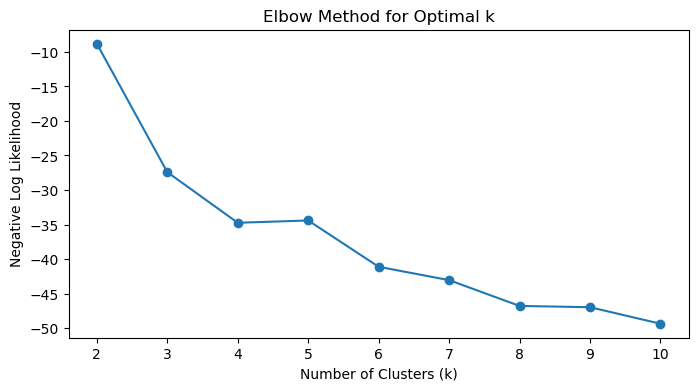

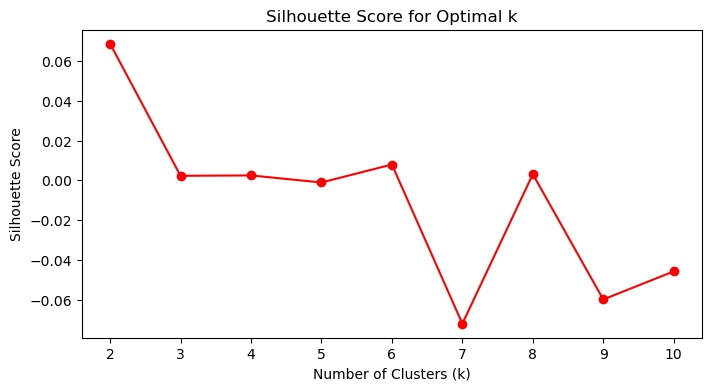

Best k selected: 2


In [26]:
negative_log_likelihood_score = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    model = EMClustering(n_components=k)
    labels = model.fit(df)
    negative_log_likelihood_score.append(model.score)
    silhouette_scores.append(model.silhouette_score())

plt.figure(figsize=(8, 4))
plt.plot(K_range, negative_log_likelihood_score, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Negative Log Likelihood")
plt.title("Elbow Method for Optimal k")
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='o', color='r')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

best_k = K_range[np.argmax(silhouette_scores)]
print(f"Best k selected: {best_k}")


Results saved to ../datasets/clustering/spotify/em_train.csv
Model saved to ../model_checkpoints/spotify/em_model.pkl


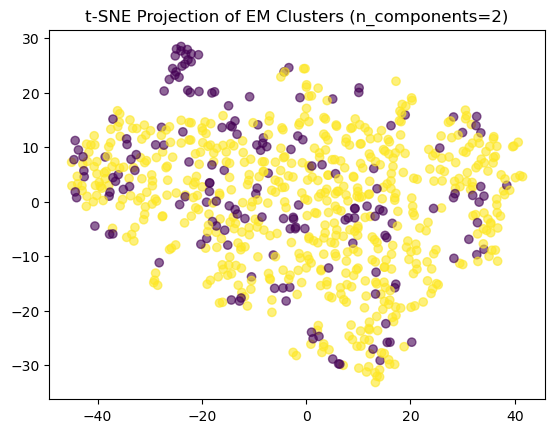

In [27]:
em = EMClustering(n_components=best_k, save_data=True)
labels = em.fit(df)

em.save_results(filename="../datasets/clustering/spotify/em_train.csv")
em.save_model(filename="../model_checkpoints/spotify/em_model.pkl")

em.plot_clusters()

In [28]:
dataset_path = "../datasets/cleaned_data/spotify_v1/test.csv"
df_test = pd.read_csv(dataset_path)

EMClustering.inference("../model_checkpoints/spotify/em_model.pkl", df_test, output_file="../datasets/clustering/spotify/em_test.csv")

Loading model from ../model_checkpoints/spotify/em_model.pkl...
Model loaded successfully!
Inference results saved to ../datasets/clustering/spotify/em_test.csv
